In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Оптимизация. Имплементация градиентного спуска

In [2]:
x = np.linspace(-50, 50, 5000)
def func1(_x): return _x**2
def grad1(_x): return 2*_x

In [19]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [20]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad 33.34057852091118
method1 33.35057852091836
method2 33.34057852091803


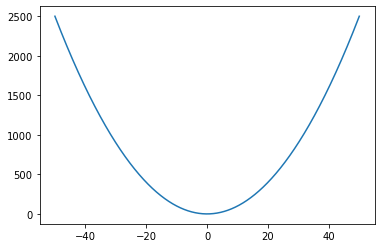

In [5]:
plt.plot(x, func1(x))
plt.show()

In [15]:
x0=np.random.uniform(-50, 50)
alpha=0.15
n_iter=75
for x in range(n_iter):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)

-5.003246791230254 25.03247845395583
-3.5022727538611775 12.265914442438357
-2.4515909277028243 6.010298076794794
-1.716113649391977 2.9450460576294497
-1.201279554574384 1.4430725682384302
-0.8408956882020688 0.707105558436831
-0.5886269817414482 0.3464817236340472
-0.41203888721901377 0.16977604458068316
-0.28842722105330965 0.08319026184453475
-0.20189905473731676 0.04076322830382203
-0.14132933831612174 0.019973981868872795
-0.09893053682128522 0.00978725111574767
-0.06925137577489965 0.004795753046716358
-0.04847596304242975 0.002349918992891015
-0.03393317412970083 0.0011514603065165977
-0.02375322189079058 0.0005642155501931329
-0.016627255323553407 0.0002764656195946351
-0.011639078726487385 0.0001354681536013712
-0.00814735510854117 6.637939526467189e-05
-0.005703148575978818 3.252590367968922e-05
-0.003992204003185173 1.593769280304772e-05
-0.002794542802229621 7.809469473493383e-06
-0.001956179961560735 3.826640042011758e-06
-0.0013693259730925143 1.8750536205857613e-06
-0.0

In [18]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
            x0-=self.alpha*grad(x0)
        return x0
opt1=optimizer(alpha, 75)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
print(x, func1(x))

6.548202699739851e-11 4.287895859688027e-21


<b>Домашнее задание: оптимизировать x^2*(np.sin(0,5*_x)^2+1)</b>
<ul>
<li>При каких значениях alpha оптимизация проходит успешно, а при каких "застревает"?</li></ul>

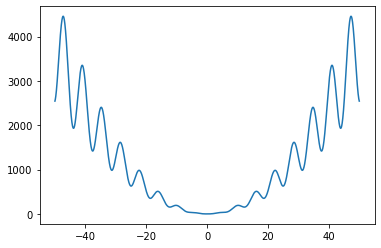

In [14]:
x = np.linspace(-50, 50, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
plt.plot(x, func2(x))
plt.show()

## Линейная регрессия

In [21]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(1, n_features ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true.T) + np.random.normal(0, 0.5, size=(n_objects, 1))

# возьмем нулевые начальные веса
w = np.zeros((1, n_features))

In [29]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_real):
    y = X.dot(w.T)
    return np.sum((y - y_real)**2) / y_real.shape[0]

In [30]:
mserror(X, w_true, Y), mserror(X, w, Y)

(0.2539609141453042, 27.436759150515137)

In [31]:
def mserror_grad(X, w, y_real):
    return 2*(X.dot(w.T)-y_real).T.dot(X)/y_real.shape[0]

In [32]:
mserror_grad(X, w_true, Y)

array([[0.06184486, 0.00184849]])

In [33]:
mserror_grad(X, w, Y)

array([[35.3278465 , 21.66257231]])

In [34]:
# список векторов весов после каждой итерации
w_list = [w.copy().flatten()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.02

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  eta * mserror_grad(X, w, Y)
    weight_dist = np.linalg.norm(new_w - w)
    
    w_list.append(new_w.copy().flatten())
    cur_error=mserror(X, new_w, Y)
    print('curent error: {0}'.format(cur_error))
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

curent error: 3.9436186677661915
curent error: 0.756681078843864
curent error: 0.32264218986871857
curent error: 0.2633269127846895
curent error: 0.2551972561383931
curent error: 0.2540802506297547
curent error: 0.2539264530003752
curent error: 0.25390523954894206
curent error: 0.2539023092160629
curent error: 0.253901903930324
curent error: 0.2539018478183829
curent error: 0.2539018400429656
curent error: 0.2539018389647554
curent error: 0.25390183881515205
curent error: 0.253901838794384
curent error: 0.25390183879149986
curent error: 0.2539018387910992
curent error: 0.2539018387910435
curent error: 0.2539018387910358
curent error: 0.2539018387910347


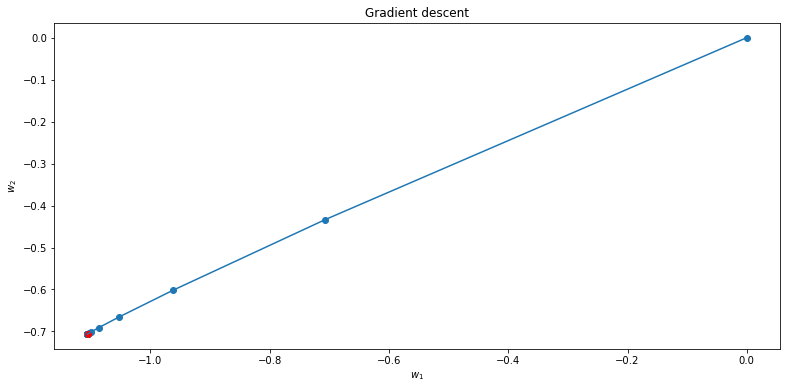

In [35]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0, 0], w_true[0, 1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

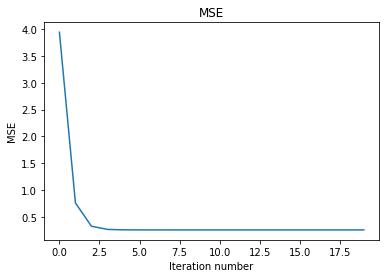

In [36]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'log(MSE)')

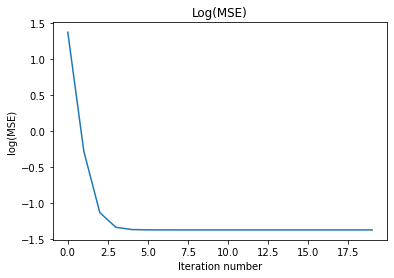

In [37]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), np.log(np.array(errors)))
plt.title('Log(MSE)')
plt.xlabel('Iteration number')
plt.ylabel('log(MSE)')

In [38]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y)).T

normal_eq_w = normal_equation(X, Y)
print('В случае использования нормального уравнения функционал ошибки составляет {0}'.format(
    round(mserror(X, normal_eq_w, Y), 4)))

В случае использования нормального уравнения функционал ошибки составляет 0.2539


In [39]:
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], 2*np.sum(delta)/y_real.shape[0]
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
        return self
    def predict(self, X):
        return (X.dot(self.w.T)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)
    

In [40]:
shift=np.random.uniform(0, 100)
Y_shift=Y+shift
lr=linear_regression(0.5)
lr.fit(X, Y_shift)
lr.test(X, Y_shift)

0.2538940696946627

In [41]:
shift, lr.w0

(36.31752967272115, 36.314736824701676)

In [42]:
lr.w, w_true

(array([[-1.1057514 , -0.70643012]]), array([[-1.10380528, -0.70633176]]))

Составил список рекомендуемой литературы:
1. Д. В. Беклемишев. Курс аналитической геометрии и Линейной алгебры.
Нужно знать все действия с матрицами плюс сингулярное разложение
2. Л. Д. Кудрявцев, А. Д. Кутасов, В. И. Чехлов, М. И. Шабунин. Сборник задач по математическому анализу.(Том 1)
Хорошая книга, чтобы научиться дифференцировать. Глава 3, параграф 13- там всё показано, всё объяснено, что надо на практике делать
3. Л. Д. Кудрявцев. Курс математического анализа.(Том 1)
Тут в параграфе 9 даётся теория по производным функций одной переменной, в параграфе 20- то же самое для функций многих переменных
4. И. Б. Петров, А. И. Лобанов. Лекции по вычислительной математике.
Про численное диференцирование, упоминаемое в первом вебинаре есть лекция 1, градиентный спуск там есть в четвертой лекции(главе), лекция 6 про интерполяцию функций будет полезна для второго вебинара, а для третьего вебинара настоятельно рекомендую ознакомиться с лекцией 7 по численному интегрированию
5. Н. И. Чернова. Теория вероятностей.
По теории вероятностей важно знать базовые вещи: что такое случайная величина, какие у неё есть характеристики, что такое кумулятивная функция распределения
6. Н. И. Чернова. Математическая статистика.
Возможно, Вам пригодится, если захотите копнуть вглубь и уяснить статистический смысл методов оценки дискриминационной способности моделей, рассматриваемых в вебинаре 3

Варианты курсовых проектов по регрессии(https://www.kaggle.com/c/tutors-expected-math-exam-results) и классификации(https://www.kaggle.com/c/choose-tutors).